# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_parquet('../Data/vizu.parquet')
plt.style.use('seaborn-v0_8-whitegrid')
fig_facecolor = 'white'
ax_facecolor = '#f9f9f9'
cols = df.columns

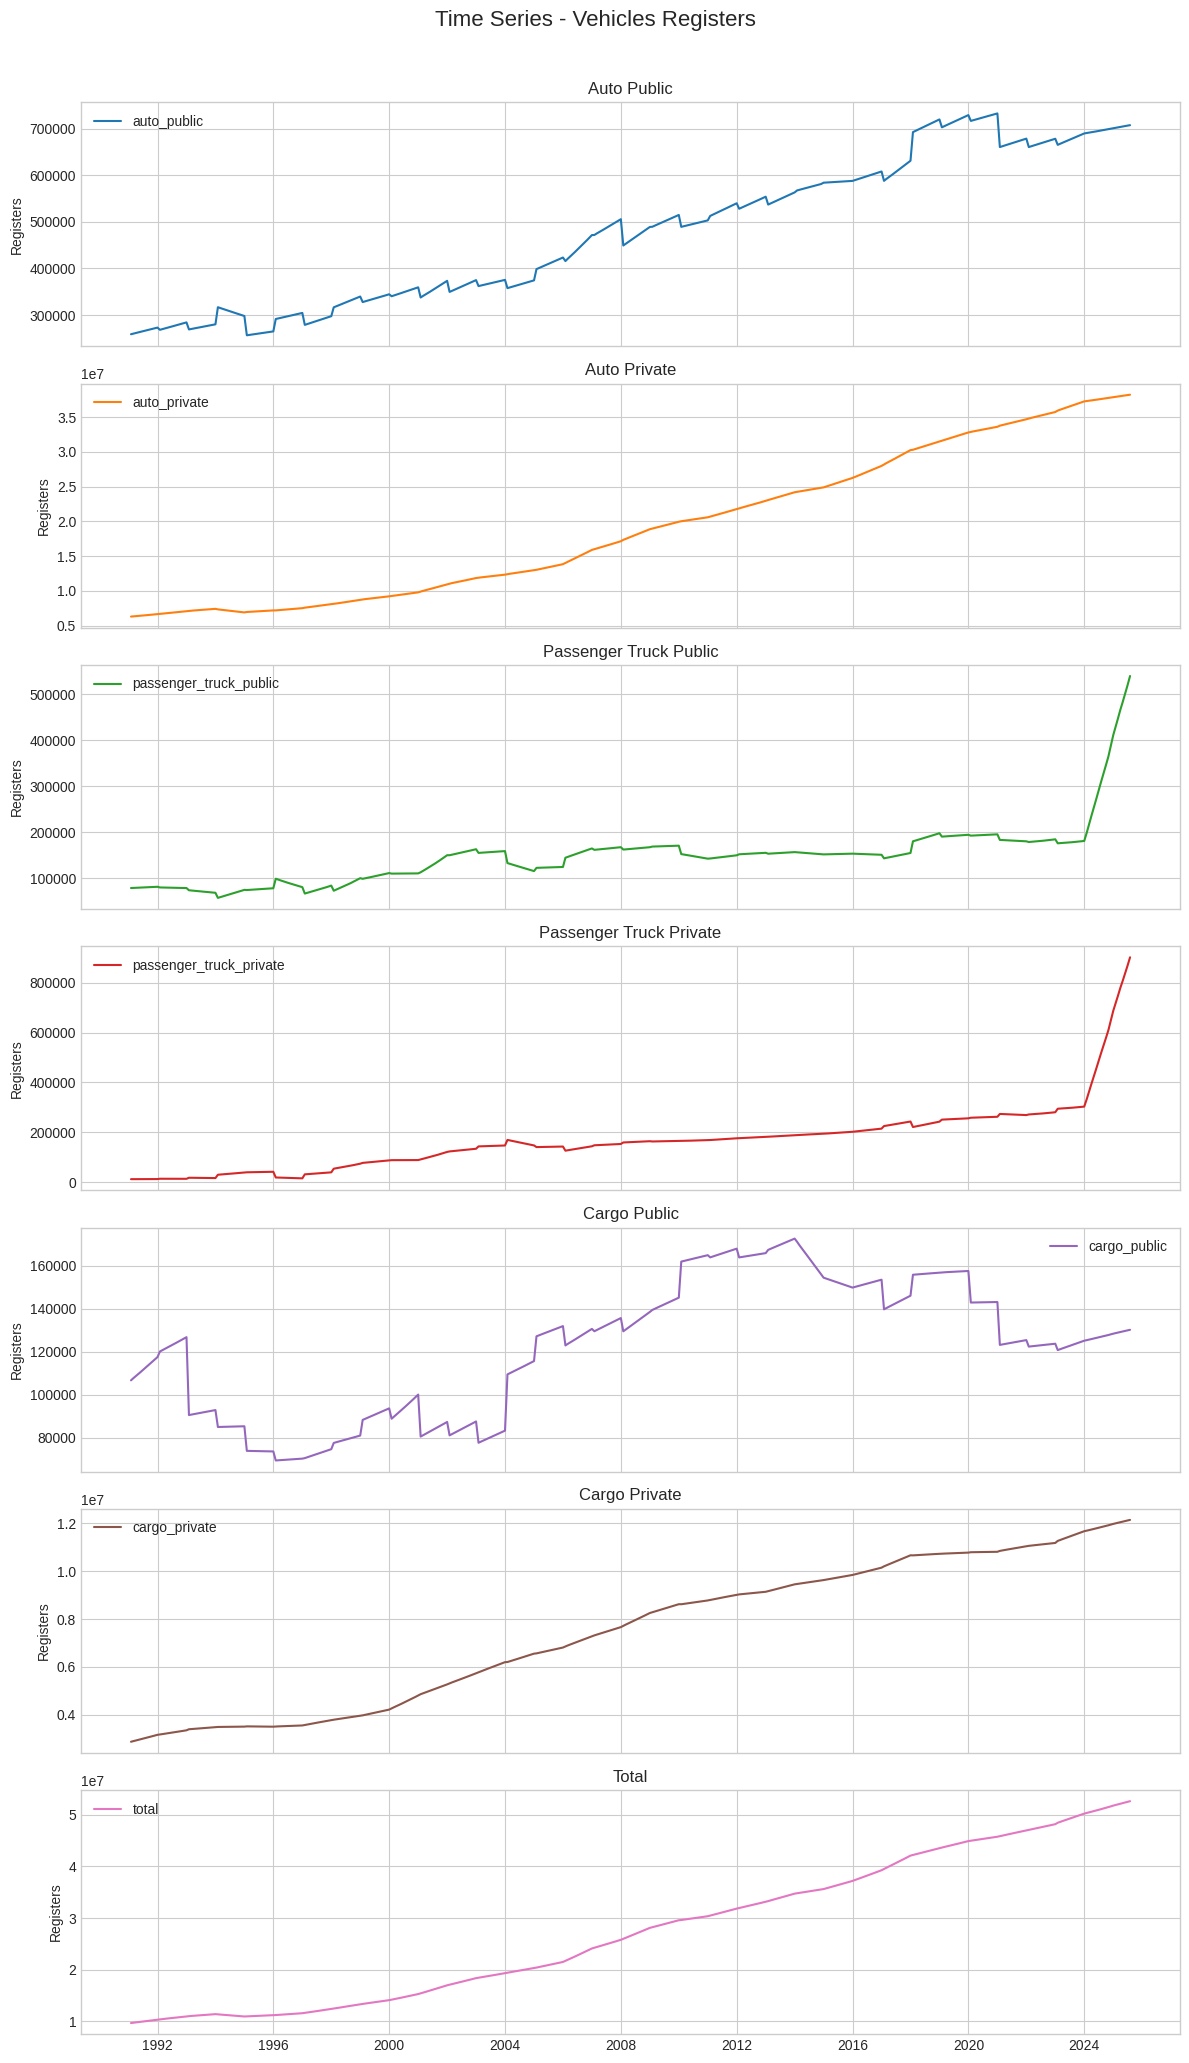

In [3]:
# Time Series

n = len(cols)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(12, 3*n), sharex=True)
fig.suptitle("Time Series - Vehicles Registers", fontsize=16)

for i, col in enumerate(cols):
    axes[i].plot(df.index, df[col], label=col, color="C"+str(i))
    title = col.replace('_', ' ').title()
    axes[i].set_title(title)
    axes[i].set_ylabel('Registers')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout(rect=[0,0,1,0.97])
plt.savefig('../Outputs/Figures/01-time-series')
plt.show()

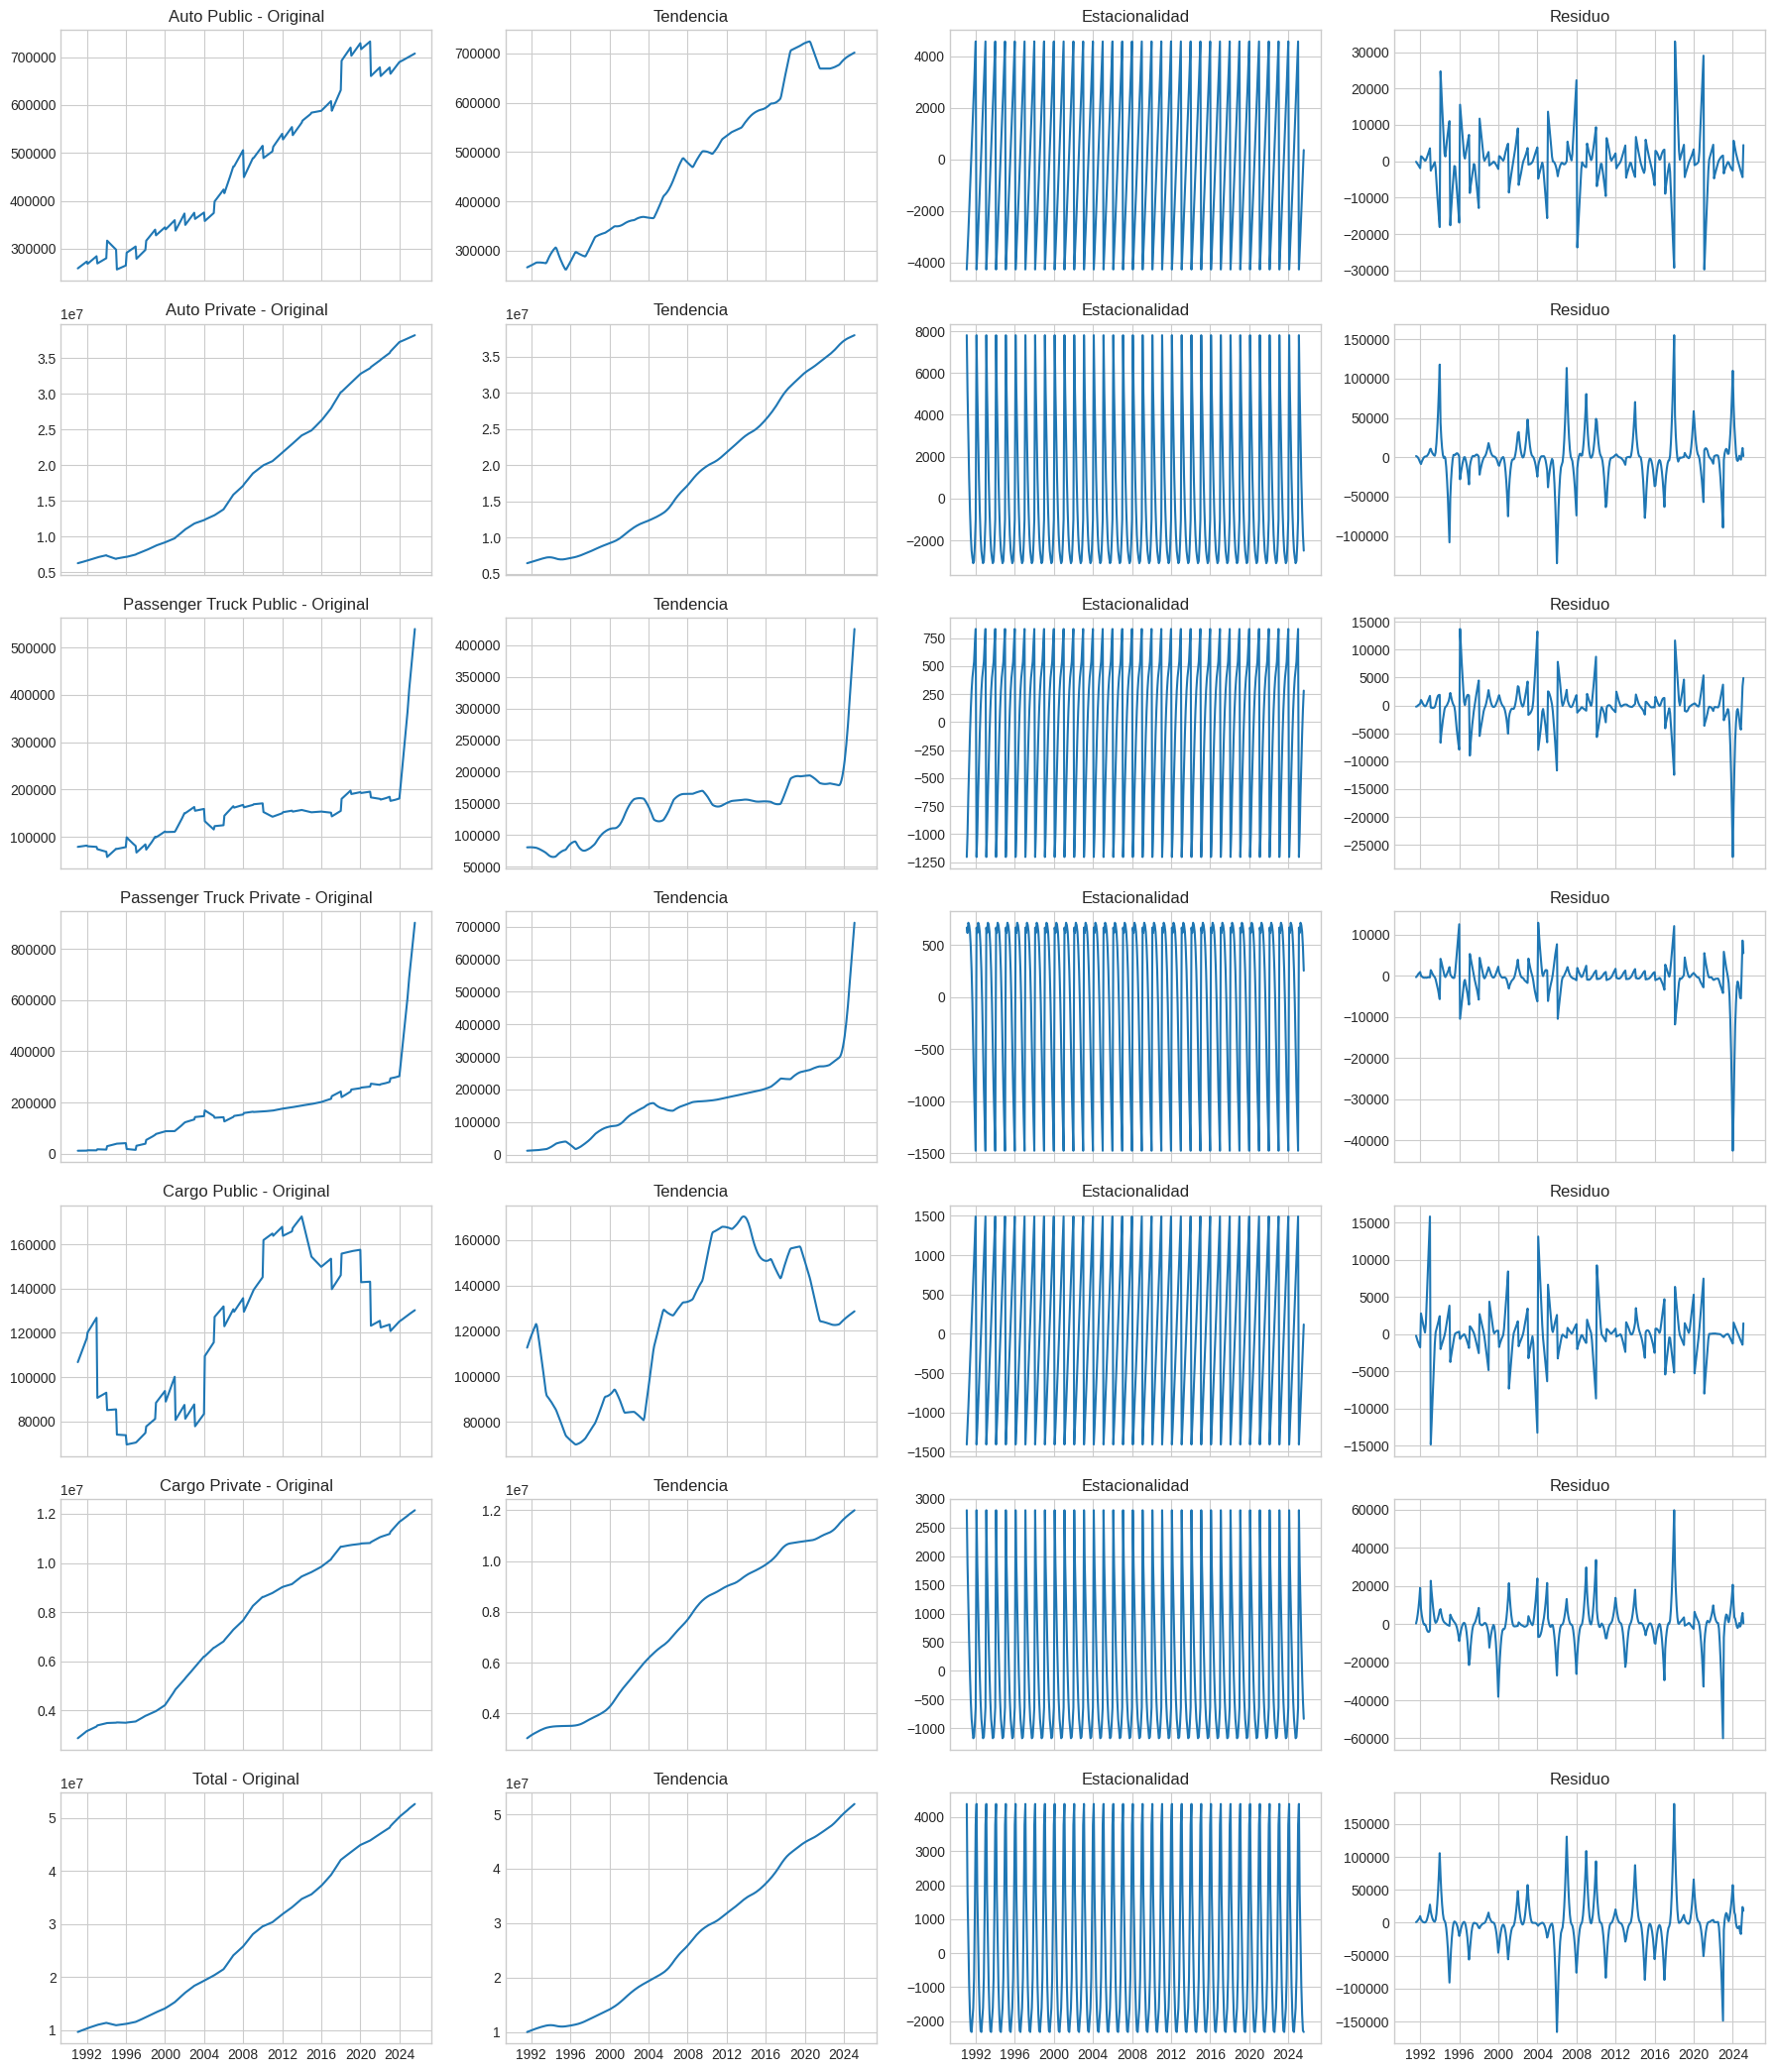

In [4]:
series_cols = df.columns

fig, axes = plt.subplots(len(series_cols), 4, figsize=(18, 3*len(series_cols)), sharex=True)

for i, col in enumerate(series_cols):
    result = seasonal_decompose(df[col].dropna(), model='additive', period=12)

    axes[i,0].plot(result.observed); axes[i,0].set_title(f"{col} - Original".replace('_', ' ').title())
    axes[i,1].plot(result.trend);    axes[i,1].set_title("Tendencia")
    axes[i,2].plot(result.seasonal); axes[i,2].set_title("Estacionalidad")
    axes[i,3].plot(result.resid);    axes[i,3].set_title("Residuo")

plt.tight_layout()
plt.savefig('../Outputs/Figures/02-decomposition')
plt.show()


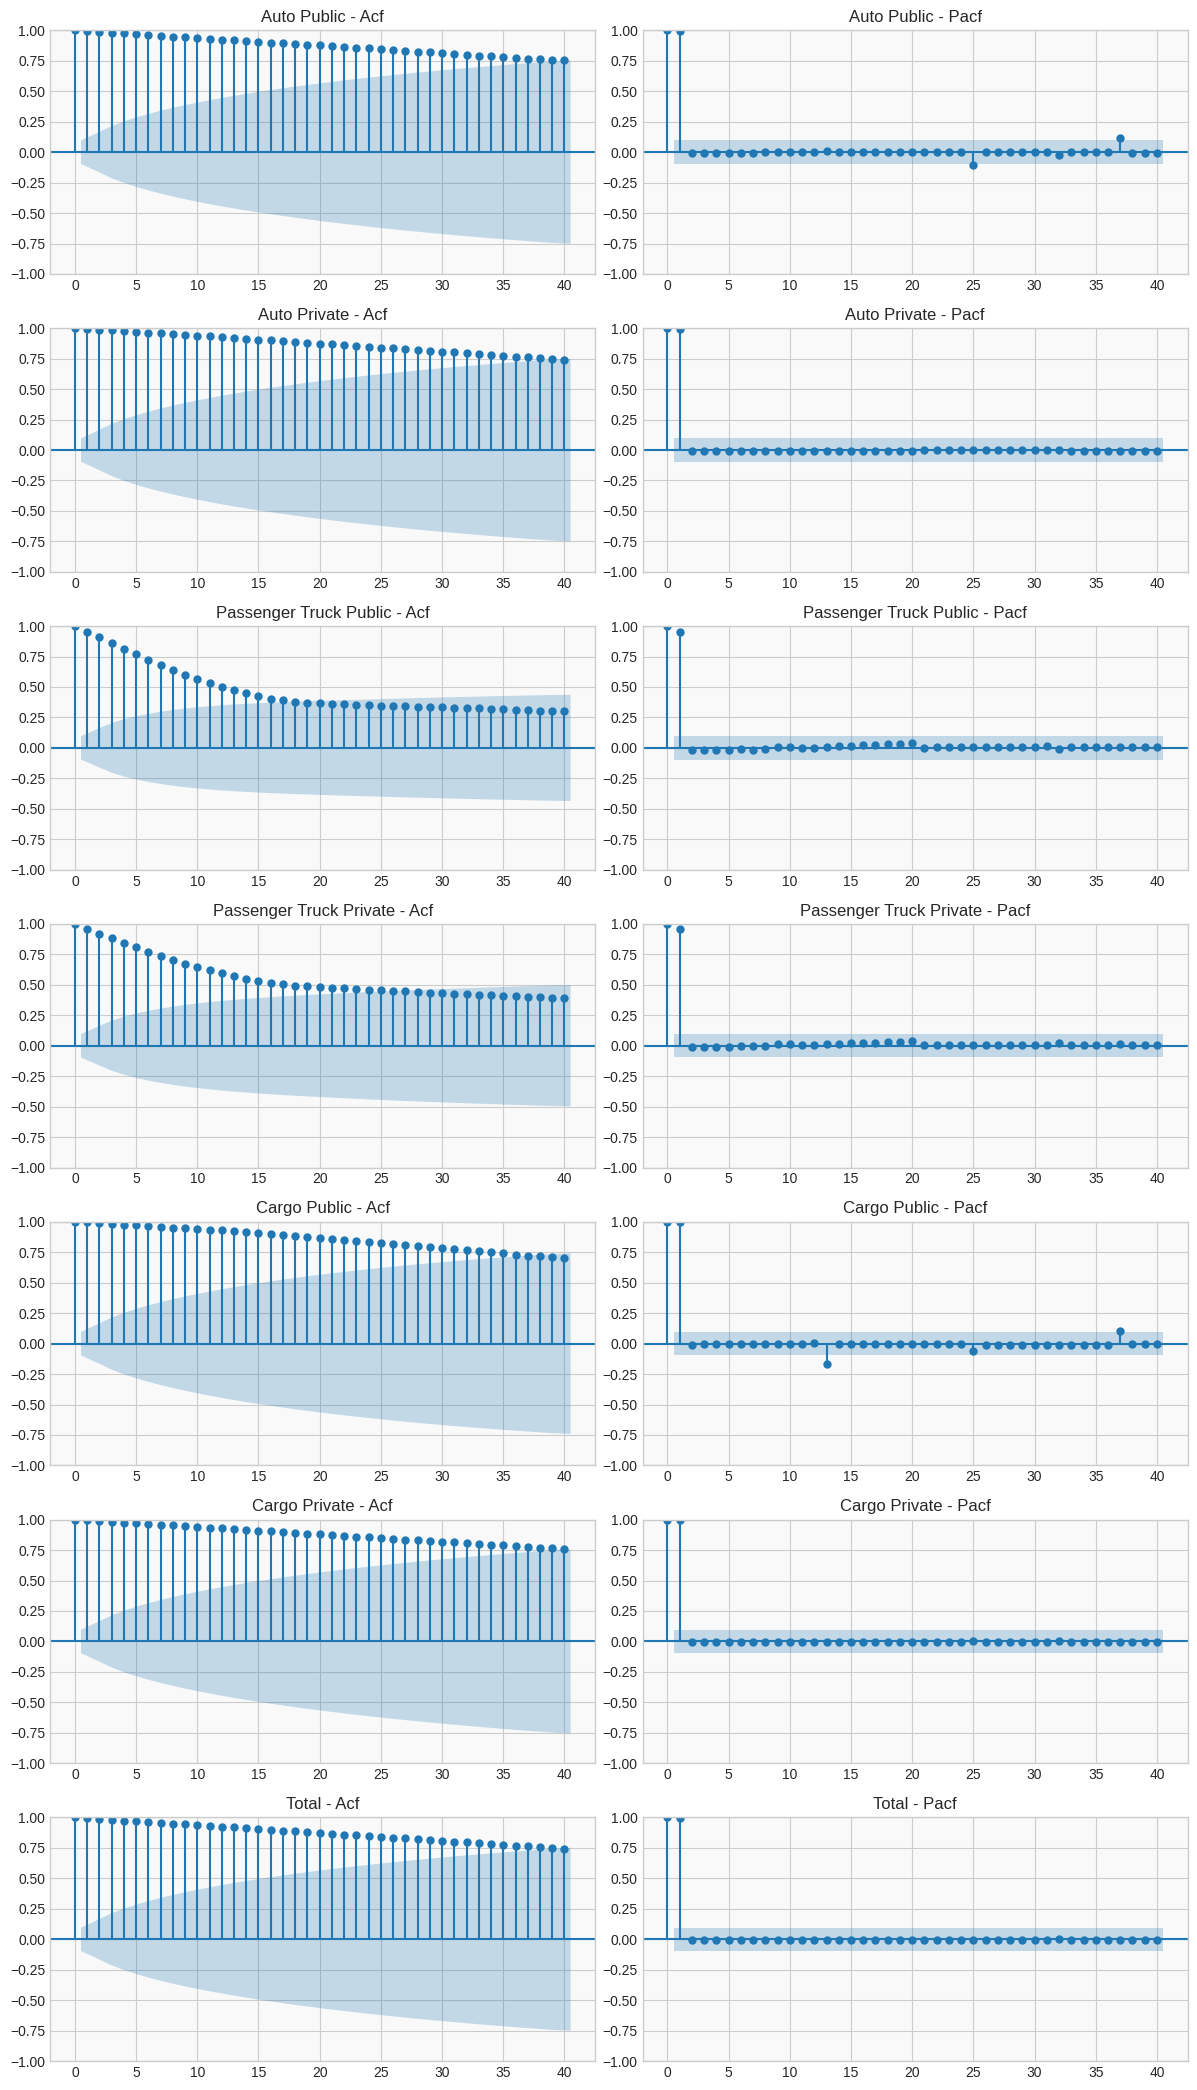

In [5]:
# ACF and PACF

fig, axes = plt.subplots(len(series_cols), 2, figsize=(12, 3*len(series_cols)), sharex=False)

for i, col in enumerate(series_cols):
    plot_acf(df[col].dropna(), lags=40, ax=axes[i,0])
    plot_pacf(df[col].dropna(), lags=40, ax=axes[i,1])

    axes[i,0].set_title(f"{col} - ACF".replace('_', ' ').title())
    axes[i,1].set_title(f"{col} - PACF".replace('_', ' ').title())
    axes[i,0].set_facecolor(ax_facecolor)
    axes[i,1].set_facecolor(ax_facecolor)

plt.tight_layout()
plt.savefig('../Outputs/Figures/03-acf-pacf')
plt.show()

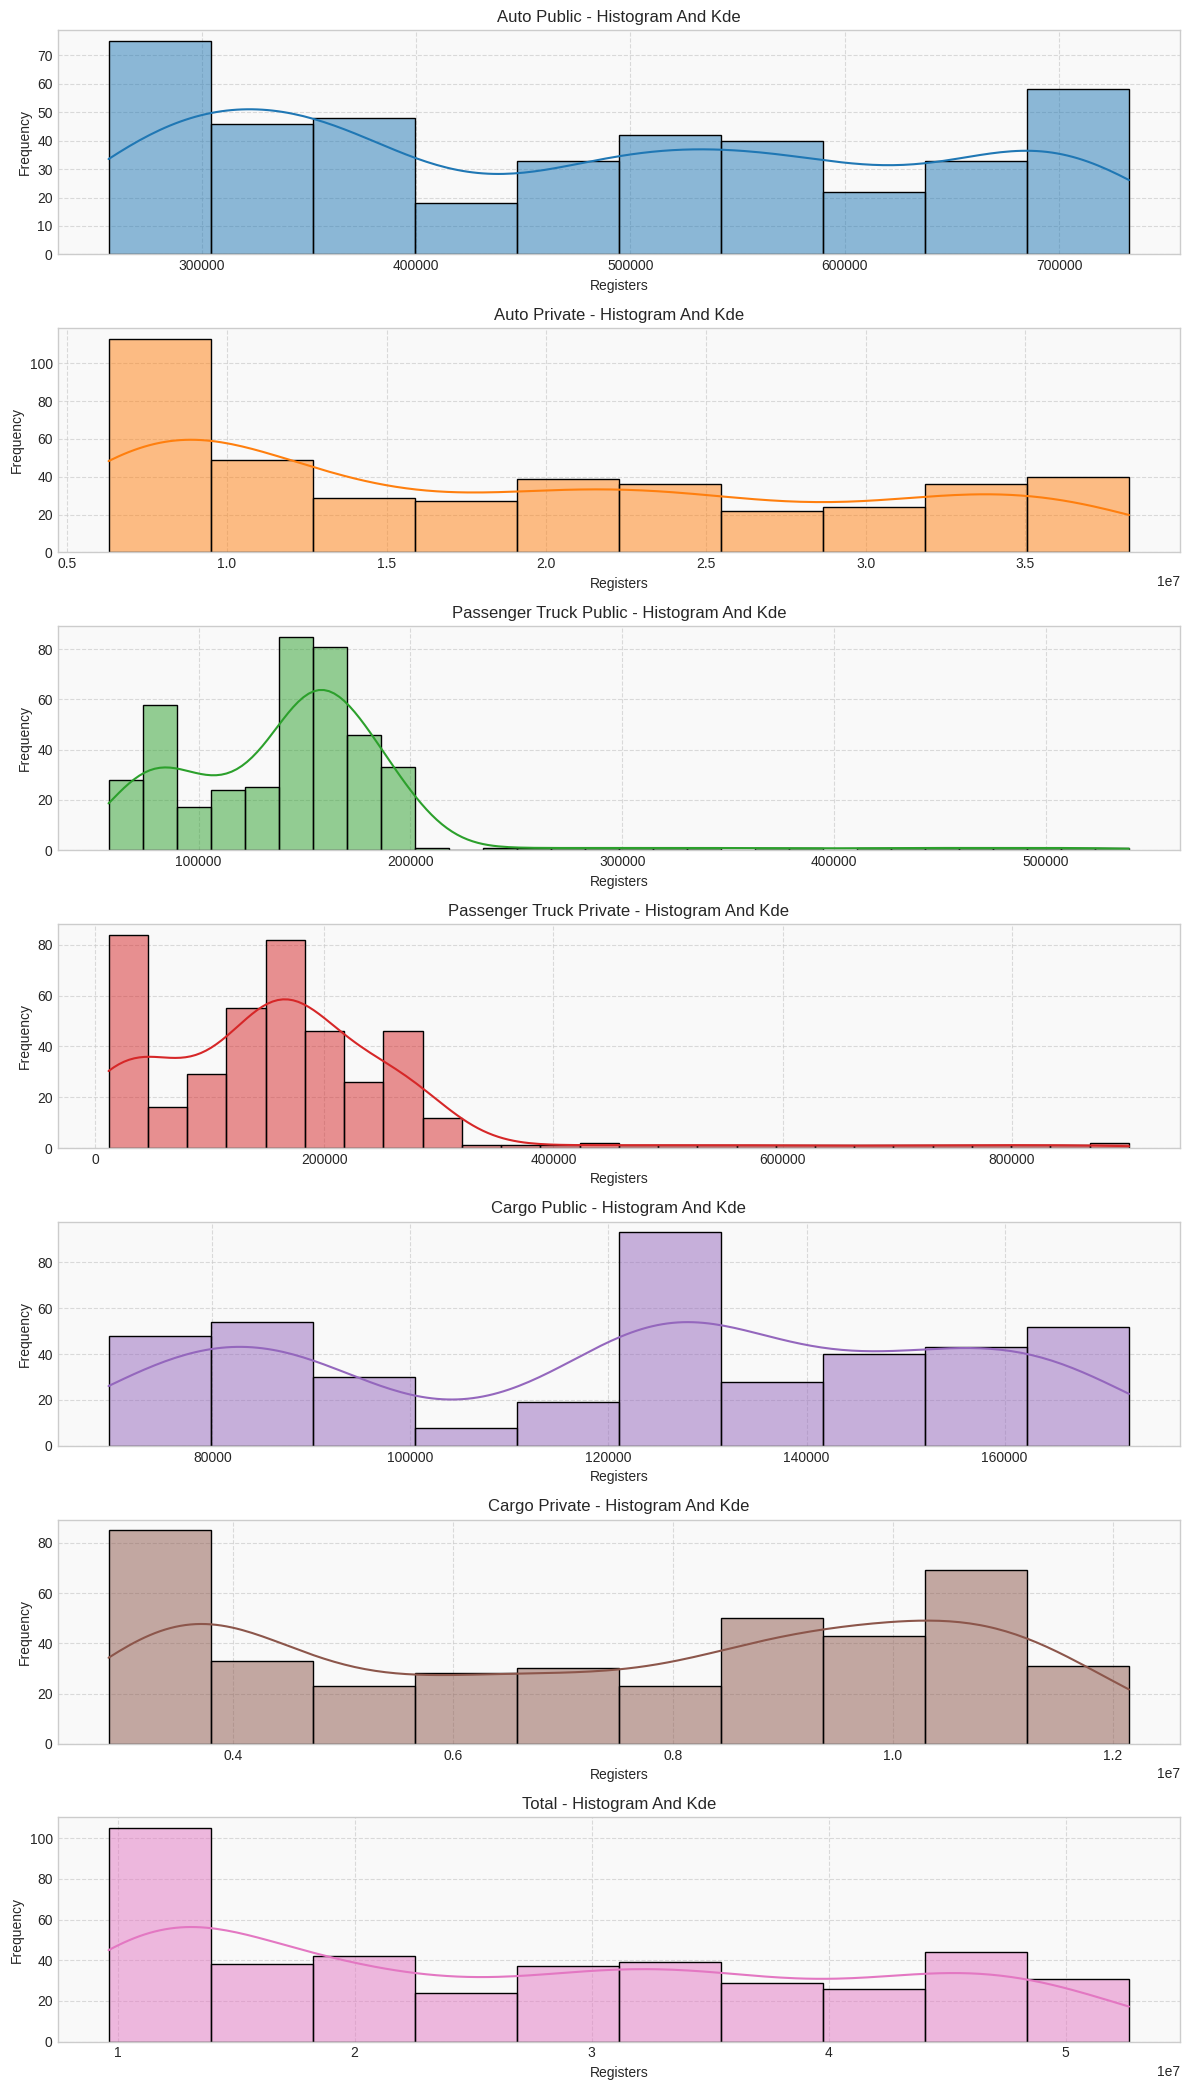

In [8]:
# Histogram and KDE

fig, axes = plt.subplots(len(series_cols), 1, figsize=(12, 3*len(series_cols)), sharex=False)
for i, col in enumerate(series_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color="C"+str(i))
    axes[i].set_title(f"{col} - Histogram and KDE".replace('_', ' ').title())
    axes[i].set_xlabel('Registers')
    axes[i].set_ylabel('Frequency')
    axes[i].set_facecolor(ax_facecolor)
    axes[i].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../Outputs/Figures/04-histogram-kde')
plt.show()